
*IMPORTING THE NECESSARY MODULES AND LIBRARIES.*

In [17]:
import tensorflow as tf
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.applications import*
from tensorflow.keras.models import*
from tensorflow.keras.layers import*
from tensorflow.keras.utils import load_img

In [18]:
lt=[cv2.ROTATE_180,cv2.ROTATE_90_COUNTERCLOCKWISE,cv2.ROTATE_90_CLOCKWISE]
def brightness(img):
  value=random.uniform(0.5,2)
  hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
  hsv=np.array(hsv,dtype=np.float64)
  hsv[:,:,1]=hsv[:,:,1]*value
  hsv[:,:,1][hsv[:,:,1]>255]=255
  hsv[:,:,2]=hsv[:,:,2]*value
  hsv[:,:,2][hsv[:,:,2]>255]=255
  hsv=np.array(hsv,dtype=np.uint8)
  img=cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
  return img

*CONNECTING WITH THE DRIVE TO IMPORT THE REQURIED DATA*


In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pathlib
import glob
directory=pathlib.Path("/content/drive/My Drive/Face Recognition")
resultant="/content/augmentedimages"
import os
import random
import cv2
items=os.listdir(directory)
classes=[]
count=0
images=[]
labels=[]
for i in items:
  i1=0
  print(i)
  classes.append(i)
  path1=f"{directory}/{i}"
  a=random.randint(5,10)
  img=cv2.imread(path1)
  img=cv2.resize(img,(224,224))
  k=i.split(".")[0]
  cv2.imwrite(f"{resultant}\{k}{i1}.jpeg",img)
  i1+=1
  while a!=0:
    img=cv2.rotate(img,lt[random.randint(0,2)])
    images.append(img)
    cv2.imwrite(f"{resultant}\{k}{i1}.jpeg",img)
    i1+=1
    labels.append(count)
    if a%2==0:
      img=brightness(img)
      images.append(img)
      cv2.imwrite(f"{resultant}\{k}{i1}.jpeg",img)
      i1+=1
      labels.append(count)
    a-=1
  count+=1
images=np.array(images)
labels=np.array(labels)

Prabhas.jpeg
Allu Arjun.jpeg
Mahesh Babu.jpeg
Megastar Chiranjeevi.jpeg
Pawan Kalyan.jpeg
Ravi Teja.jpeg
Ram Pothineni.jpeg
BalaKrishna.jpeg
NTR.jpeg
Rajinikanth.jpeg


In [6]:
images.shape

(106, 224, 224, 3)

In [7]:
from keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.models import *
from keras.applications.vgg16 import VGG16,preprocess_input

In [8]:
model=VGG16(weights="imagenet")
for i in model.layers:
  i.trainable=False
len(model.layers)

553467096/553467096 [==============================] - 11s 0us/step


23

In [9]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
transferVGG= Sequential()

In [11]:
from torchvision import transforms
for i in range(18):
  transferVGG.add(model.layers[i])
transferVGG.add(Flatten())
transferVGG.add(Dense(512,activation="relu"))
transferVGG.add(Dense(128,activation="relu"))
transferVGG.add(Dense(12,activation="Softmax"))
transferVGG.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [12]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    print("call")
    if(logs.get("accuracy")>.99):
      print("\nReached %2.2f%% accuracy,so stopping training!!"%(99))
      self.model.stop_training=True
callbacks=myCallback()

Evaluting  Accuracy of the model.

In [14]:
transferVGG.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
transferVGG.fit(images,labels,epochs=100,callbacks=[callbacks])

Epoch 1/100
4/4 [==============================] - 62s 14s/step - loss: 30.3003 - accuracy: 0.4906
Epoch 2/100
4/4 [==============================] - 68s 17s/step - loss: 1.1859 - accuracy: 0.9623
Epoch 3/100
4/4 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000 call

Reached 99.00% accuracy,so stopping training!!
4/4 [==============================] - 60s 14s/step - loss: 0.0000e+00 - accuracy: 1.0000


In [15]:
transferVGG.evaluate(images,labels)

4/4 [==============================] - 58s 13s/step - loss: 2.2861 - accuracy: 0.9906


[2.2860910892486572, 0.9905660152435303]

*PREDICTING THE SAMPLE OUTPUT OF THE MODEL.*

1/1 [==============================] - 1s 687ms/step


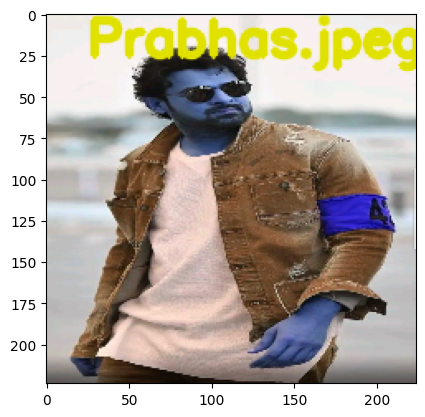

In [16]:
def predict(i,transferVGG,labels):
  path1=f"{directory}/{i}"
  img=cv2.imread(path1)
  img=cv2.resize(img,(224,224))
  a=np.argmax(transferVGG.predict(np.array([img])))
  img=cv2.putText(img,labels[a],(25,25),cv2.FONT_HERSHEY_SIMPLEX,1,(225,225,0),3,cv2.LINE_AA)
  plt.imshow(img)
predict("Prabhas.jpeg",transferVGG,classes)